In [61]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import seaborn as sns

In [62]:
area = xr.open_mfdataset("ssh_grids_v1812_1992100212.nc")
area = area.transpose()
area

<xarray.Dataset>
Dimensions:      (Latitude: 960, Longitude: 2160, Time: 1, nv: 2)
Coordinates:
  * Longitude    (Longitude) float32 0.083333336 0.25 ... 359.75 359.91666
  * Latitude     (Latitude) float32 -79.916664 -79.75 ... 79.75 79.916664
  * Time         (Time) datetime64[ns] 1992-10-02T12:00:00
Dimensions without coordinates: nv
Data variables:
    Lon_bounds   (nv, Longitude) float32 dask.array<chunksize=(2, 2160), meta=np.ndarray>
    Lat_bounds   (nv, Latitude) float32 dask.array<chunksize=(2, 960), meta=np.ndarray>
    Time_bounds  (nv, Time) datetime64[ns] dask.array<chunksize=(2, 1), meta=np.ndarray>
    SLA          (Latitude, Longitude, Time) float32 dask.array<chunksize=(960, 2160, 1), meta=np.ndarray>
    SLA_ERR      (Latitude, Longitude, Time) float32 dask.array<chunksize=(960, 2160, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6
    ncei_template_version:  NCEI_NetCDF_Grid_Template_v2.0
    Institution:            Jet Propulsion Laboratory
    geospatial_lat_min:     -79.916664
    geospatial_lat_max:     79.916664
    geospatial_lon_min:     0.083333336
    geospatial_lon_max:     359.91666
    time_coverage_start:    1992-10-02
    time_coverage_end:      1992-10-02
    date_created:           2019-02-11T20:19:57.736094
    version_number:         1812
    summary:                Sea level anomaly grids from altimeter data using...
    title:                  Sea Level Anormaly Estimate based on Altimeter Data

In [63]:
def make_figure():
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

#     generate a basemap with country borders, oceans and coastlines
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.BORDERS, linestyle='dotted')
    return fig, ax

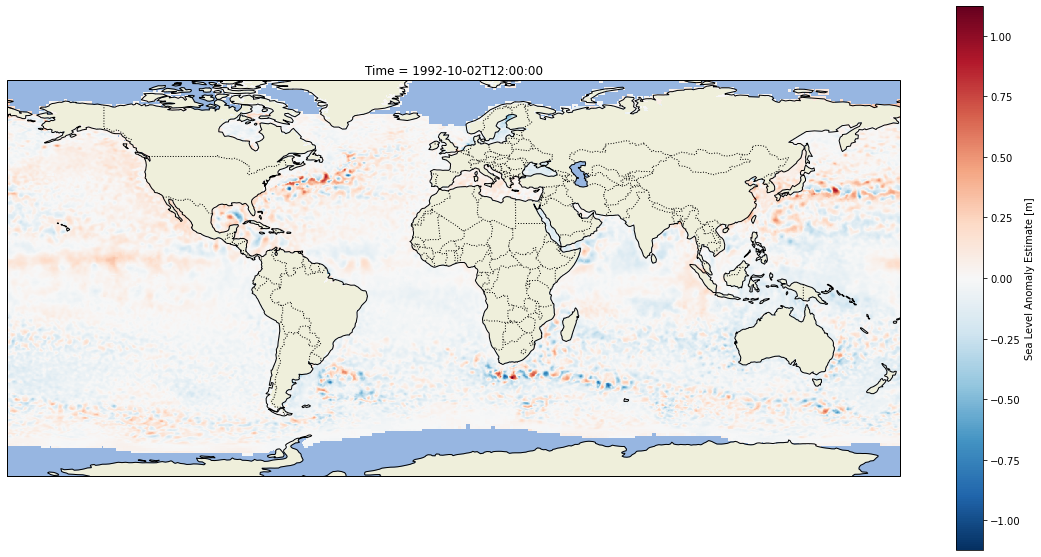

In [64]:
_, ax = make_figure()
grid = area.isel(Time=0).SLA
grid.plot(ax=ax, transform=ccrs.PlateCarree())